In [8]:
import h5py
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits import mplot3d 
import trimesh
# import pyrender

import pytorch3d
import torch
import pytorch3d.transforms

In [9]:
ls /mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/Contain/

encodings/
pilot-containment-bowl_0000.hdf5*
pilot-containment-bowl_0001.hdf5*
pilot-containment-bowl_0002.hdf5*
pilot-containment-bowl_0003.hdf5*
pilot-containment-bowl_0004.hdf5*
pilot-containment-bowl_0005.hdf5*
pilot-containment-bowl_0006.hdf5*
pilot-containment-bowl_0007.hdf5*
pilot-containment-bowl_0008.hdf5*
pilot-containment-bowl_0009.hdf5*
pilot-containment-bowl_0010.hdf5*
pilot-containment-bowl_0011.hdf5*
pilot-containment-bowl_0012.hdf5*
pilot-containment-bowl_0013.hdf5*
pilot-containment-bowl_0014.hdf5*
pilot-containment-bowl_0015.hdf5*
pilot-containment-bowl_0016.hdf5*
pilot-containment-bowl_0017.hdf5*
pilot-containment-bowl_0018.hdf5*
pilot-containment-bowl_0019.hdf5*
pilot-containment-bowl_0020.hdf5*
pilot-containment-bowl_0021.hdf5*
pilot-containment-bowl_0022.hdf5*
pilot-containment-bowl_0023.hdf5*
pilot-containment-bowl_0024.hdf5*
pilot-containment-bowl_0025.hdf5*
pilot-containment-bowl_0026.hdf5*
pilot-containment-bowl_0027.hdf5*
pilot-containment-bowl_0028.hdf5*
pil

In [10]:
# filepath = "/Users/rahulmv/Desktop/Dominoes/pilot_dominoes_0mid_d3chairs_o1plants_tdwroom_0124.hdf5"
# filepath = "/mnt/fs3/rmvenkat/data/physion_data/dominoes_one/train/pilot_dominoes_0mid_d3chairs_o1plants_tdwroom/0014.hdf5"
# filepath = "/mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/Collide/pilot_it2_collision_assorted_targets_box_0000.hdf5"

# filepath = "/mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/Roll/pilot_it2_rollingSliding_simple_ramp_tdw_1_dis_1_occ_0142.hdf5"
# filepath = '/mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/Dominoes/pilot_dominoes_SJ020_d3chairs_o1plants_tdwroom_0182.hdf5'
filepath = "/mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/Link/pilot_linking_nl1-5_aNone_bCube_occ1_dis1_tdwroom_0000.hdf5"

scenario = filepath.split('/')[-2]

# filepath = "/mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/Dominoes/encodings/bbox_mass.hdf5"

f = h5py.File(filepath)

name = filepath.split('/')[-1].split('.')[0]

In [37]:
f['frames']['0003']['camera_matrices']['camera_matrix'][:]

array([-9.4782126e-01, -7.4505806e-09, -3.1880262e-01,  0.0000000e+00,
        1.3753012e-01,  9.0216279e-01, -4.0888608e-01, -1.6938899e-01,
       -2.8761187e-01,  4.3139583e-01,  8.5508907e-01, -4.3918481e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
      dtype=float32)

In [50]:
def get_max_size(fn):
    
    try:

        with h5py.File(fn) as f:

            all_vertices = [x for x in f['static']['mesh'].keys() if 'vertices' in x]

            max_size = 0

            m_names = np.array(f['static']['model_names'])

            occluders = np.array(f['static']['occluders'])
            distractors = np.array(f['static']['distractors'])

    #         print("m_names", m_names, "occluders", occluders, "distractors", distractors)

            reject = []
            for name in m_names:
                if (name in occluders) or (name in distractors):
                    reject.append(True)
                else:
                    reject.append(False)

            for ct, ver in enumerate(all_vertices):
                if not reject[ct]:
                    sz = f['static']['mesh'][ver].shape[0]
                    if sz > max_size:
                        max_size = sz
            return max_size
    except:
        return 0

In [51]:
import glob
all_hdf5s = glob.glob("/mnt/fs3/rmvenkat/data/physion_train_data/*/*/*.hdf5")

In [ ]:
mx = 0
import time
t = time.time()
for xx in all_hdf5s:
    sz = get_max_size(xx)
    if sz > mx:
        mx = sz
print(time.time() - t)

/home/rmvenkat/testpy3_home/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [ ]:
from multiprocessing import Pool
procs = Pool(processes=45)
all_op = procs.map(get_max_size, all_hdf5s)
procs.close()

In [70]:
np.max(all_op)

175860

In [25]:
all_vertices

['vertices_0',
 'vertices_1',
 'vertices_2',
 'vertices_3',
 'vertices_4',
 'vertices_5',
 'vertices_6',
 'vertices_7']

In [348]:
f['static'].keys()

<KeysViewHDF5 ['attachent_type', 'attachment_fixed', 'attachment_id', 'base_id', 'base_type', 'bounciness', 'color', 'distractors', 'dynamic_friction', 'git_commit', 'initial_position', 'initial_rotation', 'link_type', 'mass', 'mesh', 'model_names', 'num_links', 'num_middle_objects', 'object_ids', 'object_segmentation_colors', 'occluders', 'probe_id', 'probe_mass', 'probe_type', 'push_force', 'push_position', 'push_time', 'randomize', 'room', 'scale', 'scale_x', 'scale_y', 'scale_z', 'seed', 'static_friction', 'stimulus_name', 'target_id', 'target_link_idx', 'target_rotation', 'target_type', 'trial_num', 'trial_seed', 'use_attachment', 'use_base', 'use_cap', 'zone_id']>

In [4]:
np.array(f['static']['container'])

KeyError: "Unable to open object (object 'container' doesn't exist)"

In [ ]:
np.array(f['static']['zone_id'])

In [350]:
np.array(f['static']['target_id'])

array(7, dtype=int32)

In [351]:
np.where(f['static']['object_ids'][:] == np.array(f['static']['target_id']))[0].item()

4

In [352]:
f['static']['object_ids'][:]

array([ 1,  3,  4,  6,  7,  8,  9, 10], dtype=int32)

In [353]:
f['static']['occluders'][:]

array([b'emeco_navy_chair'], dtype=object)

In [354]:
 f["static"]["scale"][:]

array([[3.5       , 0.02      , 3.5       ],
       [0.6       , 0.6       , 0.6       ],
       [0.5       , 0.12907144, 0.5       ],
       [0.35      , 0.35      , 0.35      ],
       [0.35      , 0.35      , 0.35      ],
       [0.35      , 0.35      , 0.35      ],
       [2.0151865 , 2.0151865 , 2.0151865 ],
       [1.1675618 , 1.1675618 , 1.1675618 ]], dtype=float32)

In [355]:
object_ids = np.arange(len(f['static']['object_ids']))

In [356]:
np.array(f['static']['object_ids'])

array([ 1,  3,  4,  6,  7,  8,  9, 10], dtype=int32)

In [6]:
def get_ax(fig):
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-0.5, 2)
    ax.set_zlim(-2, 2)
    
#     ax.set_xlim(-100, 100)
#     ax.set_ylim(-50, 50)
#     ax.set_zlim(-100, 100)
    ax.view_init(elev=5., azim=30, vertical_axis='y')
    return ax

def plot_box(pts, colors, close=False):
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.view_init(elev=100., azim=-90)
    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c=colors)
    return fig
#     plt.close(fig)
# plot_box(vertices_orig, colors=[[0, 0, 1]])

def get_transformed_pts(pts, rotations, trans):
#     frame = str(frame).zfill(4)

    rot = R.from_quat(rotations).as_matrix()
    transformed_pts = np.matmul(rot, pts.T).T + np.expand_dims(trans, axis=0)
    
    return transformed_pts

import colorsys 
 
def HSVToRGB(h, s, v): 
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v) 
    return (int(255*r), int(255*g), int(255*b)) 
 
def getDistinctColors(n): 
    huePartition = 1.0 / (n + 1) 
    return np.array(list((HSVToRGB(huePartition * value, .4, .5) for value in range(0, n))))/255.0


def get_vertices_scaled(f, obj_id, ob):
    
#     ob = obj_id
    
#     if obj_id == 1:
#         ob = 2
#     if obj_id == 2:
#         ob = 1
    
    vertices_orig = np.array(f['static']['mesh']['vertices_' + str(ob)])

    scales = f["static"]["scale"][:]

    vertices_orig[:,0] *= scales[obj_id, 0]
    vertices_orig[:,1] *= scales[obj_id, 1]
    vertices_orig[:,2] *= scales[obj_id, 2]
    faces_orig = np.array(f['static']['mesh']['faces_' + str(ob)])
    
    return vertices_orig, faces_orig
        
def draw3DRectangle(ax, x1, y1, z1, x2, y2, z2, color):
#     ax.set_xlim(-2, 2)
#     ax.set_ylim(-2, 2)
#     ax.set_zlim(-2, 2)
    # the Translate the datatwo sets of coordinates form the apposite diagonal points of a cuboid
    ax.plot([x1, x2], [y1, y1], [z1, z1], color=color) # | (up)
    ax.plot([x2, x2], [y1, y2], [z1, z1], color=color) # -->
    ax.plot([x2, x1], [y2, y2], [z1, z1], color=color) # | (down)
    ax.plot([x1, x1], [y2, y1], [z1, z1], color=color) # <--

    ax.plot([x1, x2], [y1, y1], [z2, z2], color=color) # | (up)
    ax.plot([x2, x2], [y1, y2], [z2, z2], color=color) # -->
    ax.plot([x2, x1], [y2, y2], [z2, z2], color=color) # | (down)
    ax.plot([x1, x1], [y2, y1], [z2, z2], color=color) # <--
    
    ax.plot([x1, x1], [y1, y1], [z1, z2], color=color) # | (up)
    ax.plot([x2, x2], [y2, y2], [z1, z2], color=color) # -->
    ax.plot([x1, x1], [y2, y2], [z1, z2], color=color) # | (down)
    ax.plot([x2, x2], [y1, y1], [z1, z2], color=color) # <--

def draw3DRectangleBox(ax, edges, pts, all_pt, color, mass):
#     ax.set_xlim(-2, 2)
#     ax.set_ylim(-2, 2)
#     ax.set_zlim(-2, 2)
    # the Translate the data two sets of coordinates form the apposite diagonal points of a cuboid
    for edge in edges:
        x1, y1, z1 = pts[edge[0]]
        x2, y2, z2 = pts[edge[1]]
        ax.plot([x1, x2], [y1, y2], [z1, z2], color=color) # | (up

    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], color=color, label=str(mass))
    
    ax.scatter(all_pt[:, 0], all_pt[:, 1], all_pt[:, 2], color=color)
    
#     ax.text()


def get_full_bbox(vertices):
    
    arr1 = vertices.min(0)
    
    arr2 = vertices.max(0)
    
    arr = np.stack([arr1, arr2], 0)
    
    pts = [(0, 0, 0), (0, 0, 1), (0, 1, 1), (0, 1, 0) , (1, 0, 0), (1, 0, 1), (1, 1, 1), (1, 1, 0)]
         
    all_edges = [(0, 1), (1, 2), (2, 3), (3, 0),  (4, 5), (5, 6), (6, 7), (7, 4), (0, 4), (1, 5), (2, 6), (3, 7)]
    
    all_faces = [(0, 1, 2, 3), (4, 5, 6, 7), (2, 3, 6, 7), (1, 0, 4, 5), (1, 2, 6, 5), \
                (0, 4, 7, 3)]    
    
    index = np.arange(3)
    
    all_pts = []
    for pt in pts:
        p1 = arr[pt, index]
        all_pts.append(p1)
    
    all_pts = np.stack(all_pts, 0)
    
    return all_pts, all_edges, all_faces   

def scatter_pts(pts):
    
    fig = plt.figure()    
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    ax.view_init(elev=100., azim=-90)
    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2])
    return

import torch

from torch import nn
from torch import Tensor


class GeodesicLoss(nn.Module):
    r"""Creates a criterion that measures the distance between rotation matrices, which is
    useful for pose estimation problems.
    The distance ranges from 0 to :math:`pi`.
    See: http://www.boris-belousov.net/2016/12/01/quat-dist/#using-rotation-matrices and:
    "Metrics for 3D Rotations: Comparison and Analysis" (https://link.springer.com/article/10.1007/s10851-009-0161-2).
    Both `input` and `target` consist of rotation matrices, i.e., they have to be Tensors
    of size :math:`(minibatch, 3, 3)`.
    The loss can be described as:
    .. math::
        \text{loss}(R_{S}, R_{T}) = \arccos\left(\frac{\text{tr} (R_{S} R_{T}^{T}) - 1}{2}\right)
    Args:
        eps (float, optional): term to improve numerical stability (default: 1e-7). See:
            https://github.com/pytorch/pytorch/issues/8069.
        reduction (string, optional): Specifies the reduction to apply to the output:
            ``'none'`` | ``'mean'`` | ``'sum'``. ``'none'``: no reduction will
            be applied, ``'mean'``: the weighted mean of the output is taken,
            ``'sum'``: the output will be summed. Note: :attr:`size_average`
            and :attr:`reduce` are in the process of being deprecated, and in
            the meantime, specifying either of those two args will override
            :attr:`reduction`. Default: ``'mean'``
    Shape:
        - Input: :math:`(N, 3, 3)`.
        - Target: :math:`(N, 3, 3)`.
        - Output: scalar.
          If :attr:`reduction` is ``'none'``, then :math:`(N)`.
    """

    def __init__(self, eps: float = 1e-7, reduction: str = "mean") -> None:
        super().__init__()
        self.eps = eps
        self.reduction = reduction

    def forward(self, input: Tensor, target: Tensor) -> Tensor:
        R_diffs = input @ target.permute(0, 2, 1)
        # See: https://github.com/pytorch/pytorch/issues/7500#issuecomment-502122839.
        traces = R_diffs.diagonal(dim1=-2, dim2=-1).sum(-1)
        dists = torch.acos(torch.clamp((traces - 1) / 2, -1 + self.eps, 1 - self.eps))
        if self.reduction == "none":
            return dists
        elif self.reduction == "mean":
            return dists.mean()
        elif self.reduction == "sum":
            return dists.sum()

from sympy import *
def asCartesian(rthetaphi):
    #takes list rthetaphi (single coord)
    r       = rthetaphi[0]
    theta   = rthetaphi[1]* pi/180 # to radian
    phi     = rthetaphi[2]* pi/180
    x = r * sin( theta ) * cos( phi )
    y = r * sin( theta ) * sin( phi )
    z = r * cos( theta )
    return [x,y,z]

def asSpherical(xyz):
    #takes list xyz (single coord)
    x       = xyz[0]
    y       = xyz[1]
    z       = xyz[2]
    r       =  sqrt(x*x + y*y + z*z)
    theta   =  acos(z/r)*180/ pi #to degrees
    phi     =  atan2(y,x)*180/ pi
    return [r,theta,phi]

from scipy.spatial.transform import Rotation as R
import transforms3d.euler as eul


def norm(vector):
    return vector/np.sqrt(np.sum(vector**2) + 1e-8)
    
def get_rotation(pts):
    
    x_axis = norm(pts[4] - pts[0])
    y_axis = norm(pts[2] - pts[1])
    z_axis = norm(pts[1] - pts[0])
    
    rotation_matrix = np.stack([x_axis, y_axis, z_axis], 0)
    
    euler_angles = pytorch3d.transforms.matrix_to_euler_angles(torch.tensor(rotation_matrix), 'XYZ')
    
#     eul.mat2euler(rotation_matrix, axes='sxyz')
    
    mat = pytorch3d.transforms.euler_angles_to_matrix(euler_angles, 'XYZ').numpy()
    
    
    
#     mat = eul.euler2mat(euler_angles[0], euler_angles[1], euler_angles[2], axes='sxyz')

    assert abs(np.sum(np.matmul(rotation_matrix, rotation_matrix.T)) - 3) < 1e-3

#     print("diff", np.mean((mat - rotation_matrix)**2))
    
    return euler_angles.numpy()

def decode(centroid, euler_angles, size):
    
    mat = pytorch3d.transforms.euler_angles_to_matrix(torch.tensor(euler_angles), 'XYZ').numpy()
    
    pts = [(-1, -1, -1), (-1, -1, 1), (-1, 1, 1), (-1, 1, -1), (1, -1, -1), (1, -1, 1), (1, 1, 1), (1, 1, -1)]

    all_edges = [(0, 1), (1, 2), (2, 3), (3, 0),  (4, 5), (5, 6), (6, 7), (7, 4), (0, 4), (1, 5), (2, 6), (3, 7)]

    all_faces = [(0, 1, 2, 3), (4, 5, 6, 7), (2, 3, 6, 7), (1, 0, 4, 5), (1, 2, 6, 5), \
                (0, 4, 7, 3)]    

    all_pts = []
    for pt in pts:
        p1 = centroid + np.matmul(mat.T, size*pt)
        all_pts.append(p1)

    all_pts = np.stack(all_pts, 0)

    return all_pts, all_edges, all_faces 
        


def get_bbox_encoding_seq(f, scenario, subsample, viz=False):
    
    m_names = np.array(f['static']['model_names'])
    mass = np.array(f['static']['mass'])
    occluders = np.array(f['static']['occluders'])
    distractors = np.array(f['static']['distractors'])
    
    print("m_names", m_names, "occluders", occluders, "distractors", distractors)
    
    reject = []
    for name in m_names:
        if (name in occluders) or (name in distractors):
            reject.append(True)
        else:
            reject.append(False)
            
#     print(reject)
#     reject = (m_names == occluders) | (m_names == distractors)
    
    object_ids = np.array(f['static']['object_ids'])
    
    o_id = np.arange(len(object_ids))
    
    id_exchange = np.where(object_ids == np.array(f['static']['target_id']))[0].item()
    special_ones = ['Contain', 'Link', 'Support']
    if scenario in special_ones:
        o_id[id_exchange] = 1
        o_id[1] = id_exchange
    
#     print(o_id)

    colors = [[0, 1, 0], [1, 0, 0]]
    
    if len(object_ids) > 2:
        colors += list(getDistinctColors(len(object_ids)-2))

    #NOTE THE FIRST OBJECT IS ALWAYS THE PATIENT
    frame_no = 0

    # %matplotlib notebook
    # %matplotlib notebook

    # %matplotlib inline

    all_imgs = []
    
    all_encodings = []

    for frame_no in range(0, len(f['frames']), subsample):

        frame = str(frame_no).zfill(4)
        
        if viz:

            fig = plt.figure(figsize=[10, 10])
            ax = get_ax(fig)
        
        all_obj_pts = []
        
        for ct, obj_id in enumerate(o_id):

#             obj_id = obj_id-1    

#             print(obj_id)

            if not reject[obj_id]:
        
#                 print(object_ids)
                if scenario in special_ones:
                    ob = obj_id
                else:
                    ob = object_ids[obj_id] - 1
        
#                 mass_ = mass[ob]
                
#                 print(ob)
                
                vertices_orig, faces_orig = get_vertices_scaled(f, obj_id, ob)
            
                size = np.max(vertices_orig, 0) - np.min(vertices_orig, 0)

                size /= 2
                
#                 print(size, vertices_orig)
                
                size = np.clip(size, -3, 3)
        
#                 size = np.minimum(size , -2)
                
                
#                 size[size==0.025] = 0.1                
                
#                 ob = obj_id
    
#                 if obj_id == 1:
#                     ob = 2
#                 if obj_id == 2:
#                     ob = 1

                rotations = np.array(f['frames'][frame]['objects']['rotations'][ob])
                trans = np.array(f['frames'][frame]['objects']['positions'][ob])

                all_pts, all_edges, all_faces = get_full_bbox(vertices_orig)
                
                frame_pts = get_transformed_pts(all_pts, rotations, trans)
                
                all_frame_pts = get_transformed_pts(vertices_orig, rotations, trans)

                centroid = np.mean(frame_pts, 0)

                euler_angles = get_rotation(frame_pts)

                encoding = [centroid, euler_angles, size]
                
                all_obj_pts.append(np.array(np.concatenate(encoding)))

                all_pts_, all_edges_, all_faces_ = decode(centroid, euler_angles, size)
                
#                 print("size", size)
                
    #             print("err", np.mean((all_pts_ - frame_pts)**2))
                if viz: 
                    print("ax", ax)
                    draw3DRectangleBox(ax, all_edges_, all_pts_, all_frame_pts, colors[ct], 0)

#                 break
#             if ct >= 1:
#                 break
        
        
        return ax
    
#         return 
    
        all_obj_pts = np.stack(all_obj_pts, 0)
    
        all_encodings.append(all_obj_pts)
        
        if viz:
            ax.legend()
            fig.savefig('temp.png')

#             plt.close(fig)

            img = plt.imread('temp.png')

            all_imgs.append(img)
    
    all_encodings = np.stack(all_encodings, 0)
    
    if viz: 
        return all_encodings, all_imgs
    
    return all_encodings

In [36]:
import time 
t = time.time()
all_encodings = get_bbox_encoding_seq(f, 'Link', 6)
print(time.time() - t)

m_names [b'cube' b'sphere' b'cone' b'woven_box' b'cube' b'cube' b'cube'
 b'lapalma_stil_chair' b'adirondack_chair'] occluders [b'adirondack_chair'] distractors [b'lapalma_stil_chair']


UnboundLocalError: local variable 'ax' referenced before assignment

m_names [b'torus' b'sphere' b'cube' b'torus' b'coffee_maker' b'b03_worldglobe'] occluders [b'b03_worldglobe'] distractors [b'coffee_maker']


<IPython.core.display.Javascript object>


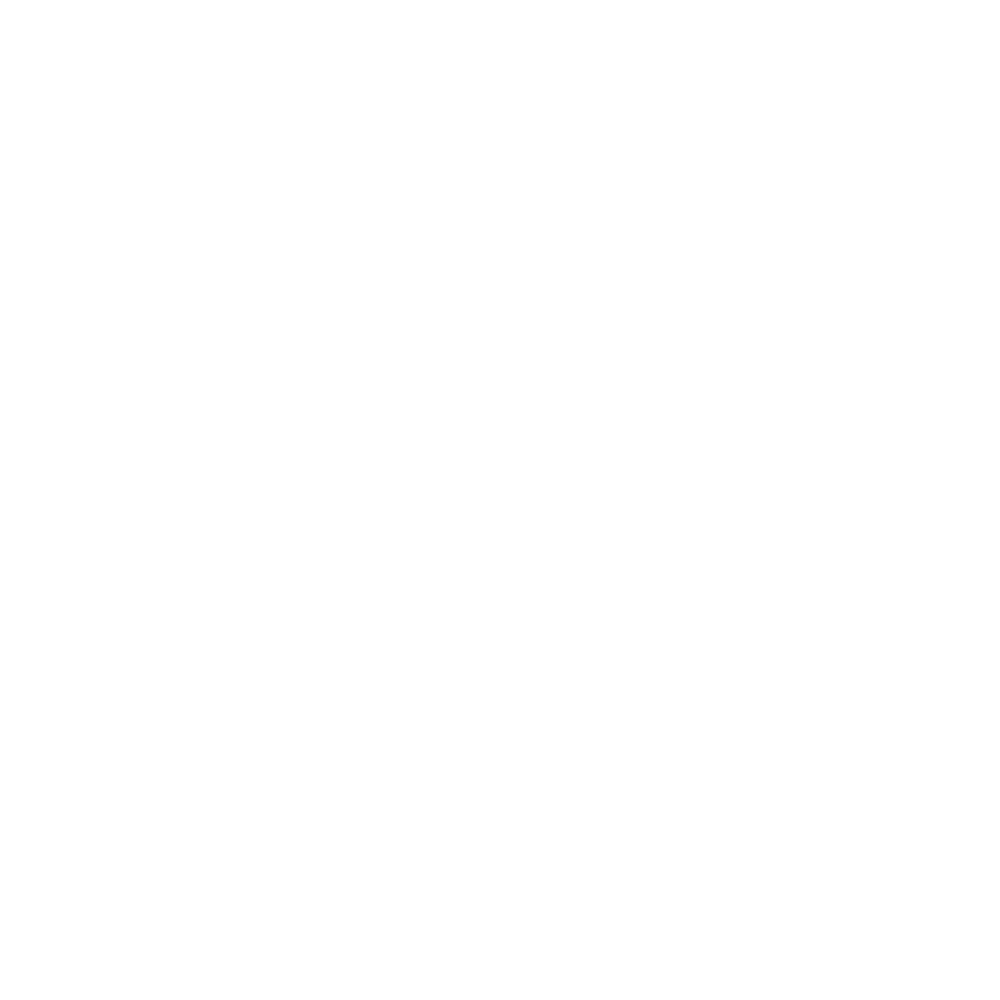

ax Axes3DSubplot(0.125,0.11;0.775x0.77)
ax Axes3DSubplot(0.125,0.11;0.775x0.77)
ax Axes3DSubplot(0.125,0.11;0.775x0.77)
ax Axes3DSubplot(0.125,0.11;0.775x0.77)
0.11612486839294434


In [7]:
%matplotlib notebook
import time 
t = time.time()
ax = get_bbox_encoding_seq(f, 'Link', 6, True)
print(time.time() - t)

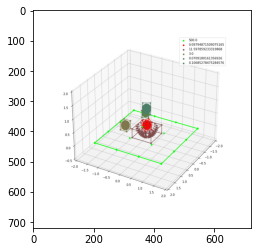

In [316]:
plt.imshow(all_imgs[1])

In [317]:
import subprocess
import cv2
def write_video(file_path, frames, fps):
    """
    Writes frames to an mp4 video file
    :param file_path: Path to output video, must end with .mp4
    :param frames: List of PIL.Image objects
    :param fps: Desired frame rate
    """

    h, w = frames[0].shape[:2]
    fourcc = cv2.cv2.VideoWriter_fourcc(*"MJPG")# cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
    writer = cv2.VideoWriter(file_path, fourcc, fps, (w, h))

    for frame in frames:
        writer.write((frame[:, :, [2,1,0]]*255).astype('uint8'))

    writer.release() 

In [318]:
write_video(name + '_dec.avi', all_imgs, 30)

In [65]:
#Get an image from a raw img tensor taken from a tdw saved video
def get_image(raw_img):
    '''
    raw_img: binary image to be read by PIL
    returns: HxWx3 image
    '''
    img = Image.open(io.BytesIO(raw_img))
    
    return np.array(img)


In [179]:
from PIL import Image
import io

imgs = []
for fr in f['frames'].keys():
    img = get_image(np.array(f['frames'][fr]['images']['_img']))
    imgs.append(img)

In [180]:
write_video(name + '_dec_rgb.avi', imgs, 30)

In [141]:
name

'pilot_it2_rollingSliding_simple_ledge_box_1_dis_1_occ_0127'

In [66]:
f['frames']['0000']['images']['_img']

<HDF5 dataset "_img": shape (92920,), type "|u1">

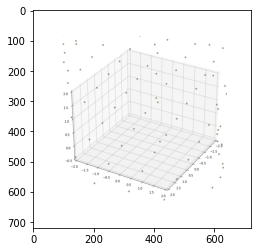

In [98]:
plt.imshow(all_imgs[3])

**what do the rot and trans mean??**

In [ ]:
vertices_orig, faces_orig = get_vertices_scaled(1)

np.max(vertices_orig, 0) - np.min(vertices_orig, 0)

trans = np.array(f['frames']['0150']['objects']['positions'][1])

rotations = np.array(f['frames']['0150']['objects']['rotations'][1])

rotations, trans

d = np.sqrt(np.sum(rotations[:3]**2))
rotations[:3]/d

d

2*np.arctan2(d, rotations[3])*180/3.14385

In [275]:
ls '/mnt/fs3/rmvenkat/data/physion_train_data/dynamics_training/'

Collide/         Dominoes/        Drop/        Roll/
Collide.tar.gz*  Dominoes.tar.gz  Drop.tar.gz  Roll.tar.gz
Contain/         Drape/           Link/        Support/
Contain.tar.gz*  Drape.tar.gz     Link.tar.gz  Support.tar.gz


In [ ]:
Collide Dominoes Drop Contain Drape Link Support

In [2]:
import torch
print(torch.cuda.current_device())

0


In [3]:
torch.version.cuda


'10.2'

In [69]:
np.array(f['static']['mass'])

array([ 500.,    2., 1000.])

In [75]:
np.array(f['static']['object_ids'])

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [ ]:
Collide/         Dominoes/        Drop/        Roll/